<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/categorical_mixed_bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columnbs from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

  Age Sex Cancer Coronary_heart_disease Depression Smoked_100_cig Education
1  64   1      1                      1          2              1         8
2  37   2      2                      2          2              2         8
3  72   2      2                      2          2              2         5
4  84   2      2                      2          2              2         6
5  31   2      2                      2          2              1         8
6  81   2      1                      2          2              2         4
  Region Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1      3       4     74    235           8                3               108
2      3       3     69    218           9                3                 0
3      3       5     64    240           8                1                12
4     

In [2]:
# Loading in and or installing packages
library(dplyr)
install.packages("reshape2")
library(reshape2)
library(ggplot2)
install.packages('gridExtra')
library(gridExtra)
library(zip)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")

# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')
# Creating a copy of df
df_copy <- df

# Converting below columns in the df_copy dataframe to factors with original labels.
df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic.Strength` <- factor(df_copy$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))

### *Categorical Variables*

**Contingency Table**

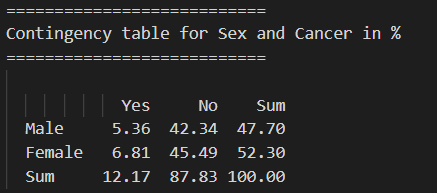

The above image is a semi-Contingency table. This allows us to visualize the frequency distribution of two or more categorical variables. In general, the values typically represent counts, but I have added proportions and margins for clarity and personal preference. In the context of this project, the table portrays the frequency distribution of the Sex and Cancer variables.

5.36% of the sampled adults are male and have been told they have cancer.

6.81% of the sampled adults are female and have been told they have cancer.

42.34% of the sampled adults are male and have not been told they have cancer.

45.49% of the sampled adults are female and have not been told they have cancer.



A good portion of the code below was initially written with the help of Claude. Originally, I was simply printing all 36 contingency tables directly in the notebook. However, I realized that doing so would require a significant amount of scrolling and could potentially overwhelm anyone viewing the notebook.

My next plan was to export each table as a CSV file to a folder and then import them into either Google Sheets or Microsoft Excel to improve their appearance. Unfortunately, I no longer have access to Microsoft 365, so I can't use Power Query. Google Sheets doesn't have any built-in features or extensions that make this easy either—I tried using Sheetgo, but it didn’t retrieve the CSV filenames as expected.

After consulting with Claude, it initially suggested creating an HTML page to display the tables. However, it also proposed saving everything into a single text file, which I thought was a better solution.

In [4]:
# Creating the output file
txt_output <- "contingency_tables_report.txt"
# Creating connection to output file
fileConn <- file(txt_output)
# Open file connection in writing mode
open(fileConn, "w")

# Loop to iterate through all columns except the last one
for (i in 1:(length(cat_cols)-1)) {
  # Grabbing the ith column
  col1 <- cat_cols[i]

  # Loop to iterate through all columns that come after the current column
  for (j in (i+1):length(cat_cols)) {
    # Grabbing the jth column
    col2 <- cat_cols[j]

    # Adding Section Headers
    writeLines(paste("\n\n==========================="), fileConn)
    writeLines(paste("Contingency table for", col1, "and", col2, 'in %'), fileConn)
    writeLines(paste("==========================="), fileConn)

    # Creating contingency table, ct, with the col1 and col2 columns
    ct <- table(df_copy[[col1]], df_copy[[col2]])
    # Creating a proportion table based on ct, convert to percentages, and round to three decimal places
    pt <- round(prop.table(ct) * 100, 2)
    # Add proportions to the contingency table.
    ad <- addmargins(pt)

    # Captures output of ad.
    output <- capture.output(print(ad))
    # Send output to the file
    writeLines(output, fileConn)
  }
}

# Close the file connection.
close(fileConn)

The text file contains 36 contingency tables. Below are the main highlights:

* Females show slightly higher rates of being told they have depression and cancer compared to males.

* Males are more likely to have smoked 100 cigarettes.

* Males outpace females in education levels ranging from 1st–11th grade through high school (and professional degrees), while females outpace males from "some college" through master's degrees.

* Individuals who meet both aerobic and strength exercise guidelines exhibit lower rates of daily anxiety compared to those meeting neither guideline.

* The South region generally shows higher rates of anxiety and a greater proportion of individuals meeting neither exercise guideline.

* There is minimal occurrence of individuals having both cancer and coronary heart disease.

* High school and higher education levels are more commonly associated with individuals who have not smoked 100 cigarettes, compared to those who have.

These observations reflect trends within the dataset and are not necessarily generalizable truths. It's also possible that some of the observed patterns are due to chance. For example, since the South region is the most represented, it makes sense that it would also have the highest raw counts for certain conditions like anxiety. Statistical tests could be performed to determine whether these associations are significant.

You can view all the contingency tables at the following link: [Contingency Ts](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/extra_material/contingency_tables_report.txt).

---

**Chi-Square Tests**

Next up is performing a chi-square test for each combination of categorical variables. A chi-square test, in simple terms, tests whether there is a relationship between two categorical variables [1]. For this test, we must first specify a null and alternate hypothesis:  
* H<sub>0</sub> (null): No relationship exists between the two categorical variables.  
* H<sub>a</sub> (alternative): A relationship exists between the two categorical variables.

If the p-value is below a certain threshold (usually 0.05), we have sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. For this test to be reliable, we would need to check the assumptions for a chi-square test. However, since this is part of exploratory data analysis, I won't address them here.



In [5]:
# Setting null_rejected to 0
null_rejected <- 0

# Loop to iterate through all columns except the last one
for (i in 1:(length(cat_cols)-1)) {
  # Grabbing the ith column
  col1 <- cat_cols[i]
  # Loop to iterate through all columns that come after the current column
  for (j in (i+1):length(cat_cols)) {
    # Grabbing the jth column
    col2 <- cat_cols[j]
    # Creating contingency table, ct, with the col1 and col2 columns
    ct <- table(df_copy[[col1]], df_copy[[col2]])

    # Running a chi-square test on ct
    c_test <- chisq.test(ct)
    # Extracting the p-value from the chi-square test
    p_val <- c_test$p.value

    # If statement that checks if the p-value is less than or equal to 0.05
    if (p_val <= 0.05) {

      # Below code was commented out so there wasn't overwhelming amount of information being thrown out
      # cat('Using a p-value of 0.05, there is enough evidence to suggest there is a relationship between',col1,'and',col2,'\n')


      # Adding 1 to what the null_rejected variable is currently at
      null_rejected <- null_rejected + 1
    }
  }
}

# Outputing how many null hypotheses were rejected
cat('There were', null_rejected,'null hypotheses that were rejected.')

There were 36 null hypotheses that were rejected.

36 null hypotheses were rejected, suggesting a relationship between every pair of categorical variables.

One thing to consider in the future is that, since we performed 36 tests, there is a greater chance of making at least one false positive (incorrectly rejecting the null hypothesis when it is actually true) [2]. However, we could account for this by dividing the normal p-value (0.05) by the number of tests performed (36), using the Bonferroni correction [2]. We would then use this adjusted value to determine whether we have sufficient evidence to reject the null hypothesis.

---

**Stacked Bar Charts**

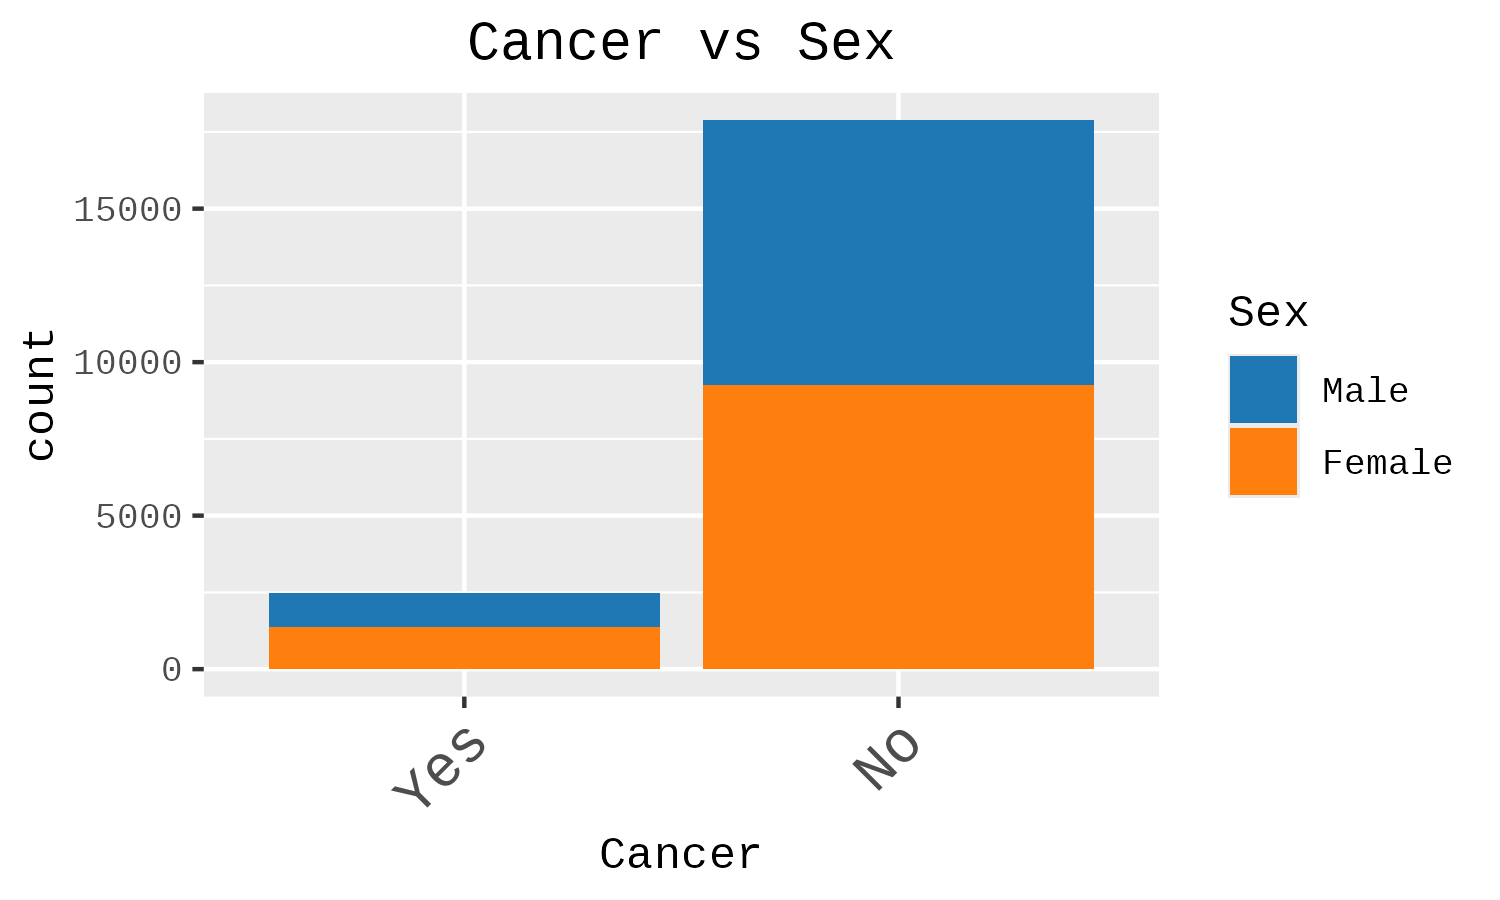

The above is an example of a Stacked Bar Chart, with Cancer being the primary feature and Sex serving as the secondary feature.
This can be thought of as a visual representation of a contingency table.

What the above table tells us is that there is a fairly equal balance of Sex in those that don't have cancer. It does also appear for those that do have cancer, that there may be slightly more females compared to males.

In [6]:
# Creating vector of differnet colors to be used
colors <- c("#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
            "#9467BD", "#8C564B", "#E377C2", "#17BECF",
            "#BCBD22", "#AEC7E8")

# Folder to save images
output_folder <- "bar_charts"
dir.create(output_folder, showWarnings = FALSE)


# Loop through every entry in the cat_cols vector
for (x_var in cat_cols){
  # Loop through every entry in the cat_cols vector
  for (y_var in cat_cols){

    # If x_var isn't the same as y_var, then create a graph.
    # It wouldn't make sense to have a stacked bar chart with Sex on the x-axis and Sex on the y-axis and so on for every other feature
    if (x_var != y_var){

        # Code to create stacked bar chart.
        p <- ggplot(df_copy, aes(x = .data[[x_var]], fill = .data[[y_var]])) +
          geom_bar() +
          ggtitle(paste(x_var, "vs", y_var)) +
          scale_fill_manual(values = colors) +
          theme(plot.title = element_text(hjust = 0.5),
                axis.text.x = element_text(size=12, angle = 45, hjust = 1))


        # Saving ploting to output folder
        filename <- paste0(output_folder, "/", x_var, "_vs_", y_var, ".png")
        ggsave(filename, plot = p, width = 5, height = 3)

    }
  }
}

# Zip all PNG from output_folder
zip::zip(zipfile = "bar_charts.zip", files = list.files(output_folder, full.names = TRUE))

Since there are 72 graphs, not all of them will be displayed here. However, you can view all the graphs at the following link:
 [Stacked Bar Charts](https://github.com/Cstan1987stat/health-survey-cluster-analysis/tree/main/graphs/stacked_barcharts).

## *Mixed*

This section will look at a numerical and categorical variable.

**Group Wise Statistics**

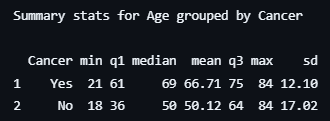

The above is an example of groupwise statistics. Instead of examining the summary statistics for Age across the entire dataset, this approach selects a categorical variable, Cancer, and splits the data based on its categories. It then computes the summary statistics separately for individuals who have been told they have cancer and for those who have not.

In this case, individuals who have been told they have cancer have a mean age of 66.71 years, a median of 69, and a standard deviation of 12.10. Meanwhile, individuals who have not been told they have cancer have a mean age of 50.12 years, a median of 50, and a standard deviation of 17.02.

In [7]:
# Creating the output file
txt_output <- "group_wise_summary_stats_report.txt"

# Creating connection to output file
fileConn <- file(txt_output)
open(fileConn, "w")

# Loop through categorical and numeric columns
for (g in cat_cols) {
  for (i in num_cols) {
    # Write the header for each combination
    writeLines('---------------------------------------', fileConn)
    writeLines(paste('Summary stats for', i, 'grouped by', g), fileConn)
    writeLines(paste(''), fileConn)


    # Group data and compute summary statistics
    summary_df <- df_copy %>%
      group_by(.data[[g]]) %>%
      summarize(
        min = min(.data[[i]], na.rm = TRUE),
        q1 = round(quantile(.data[[i]], 0.25, na.rm = TRUE),2),
        median = round(median(.data[[i]], na.rm = TRUE),2),
        mean = round(mean(.data[[i]], na.rm = TRUE),2),
        q3 = round(quantile(.data[[i]], 0.75, na.rm = TRUE),2),
        max = max(.data[[i]], na.rm = TRUE),
        sd = round(sd(.data[[i]], na.rm = TRUE),2)
      )

    # Capture the summary output and write to file
    output <- capture.output(as.data.frame(summary_df))
    writeLines(output, fileConn)
    writeLines('', fileConn)
  }
}

# Closing the file connection
close(fileConn)

Those wanting to view all the summary statistics can do so at the following link: [Group Wise Summary Statistics](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/extra_material/group_wise_summary_stats_report.txt).

---

**Grouped Box Plots**

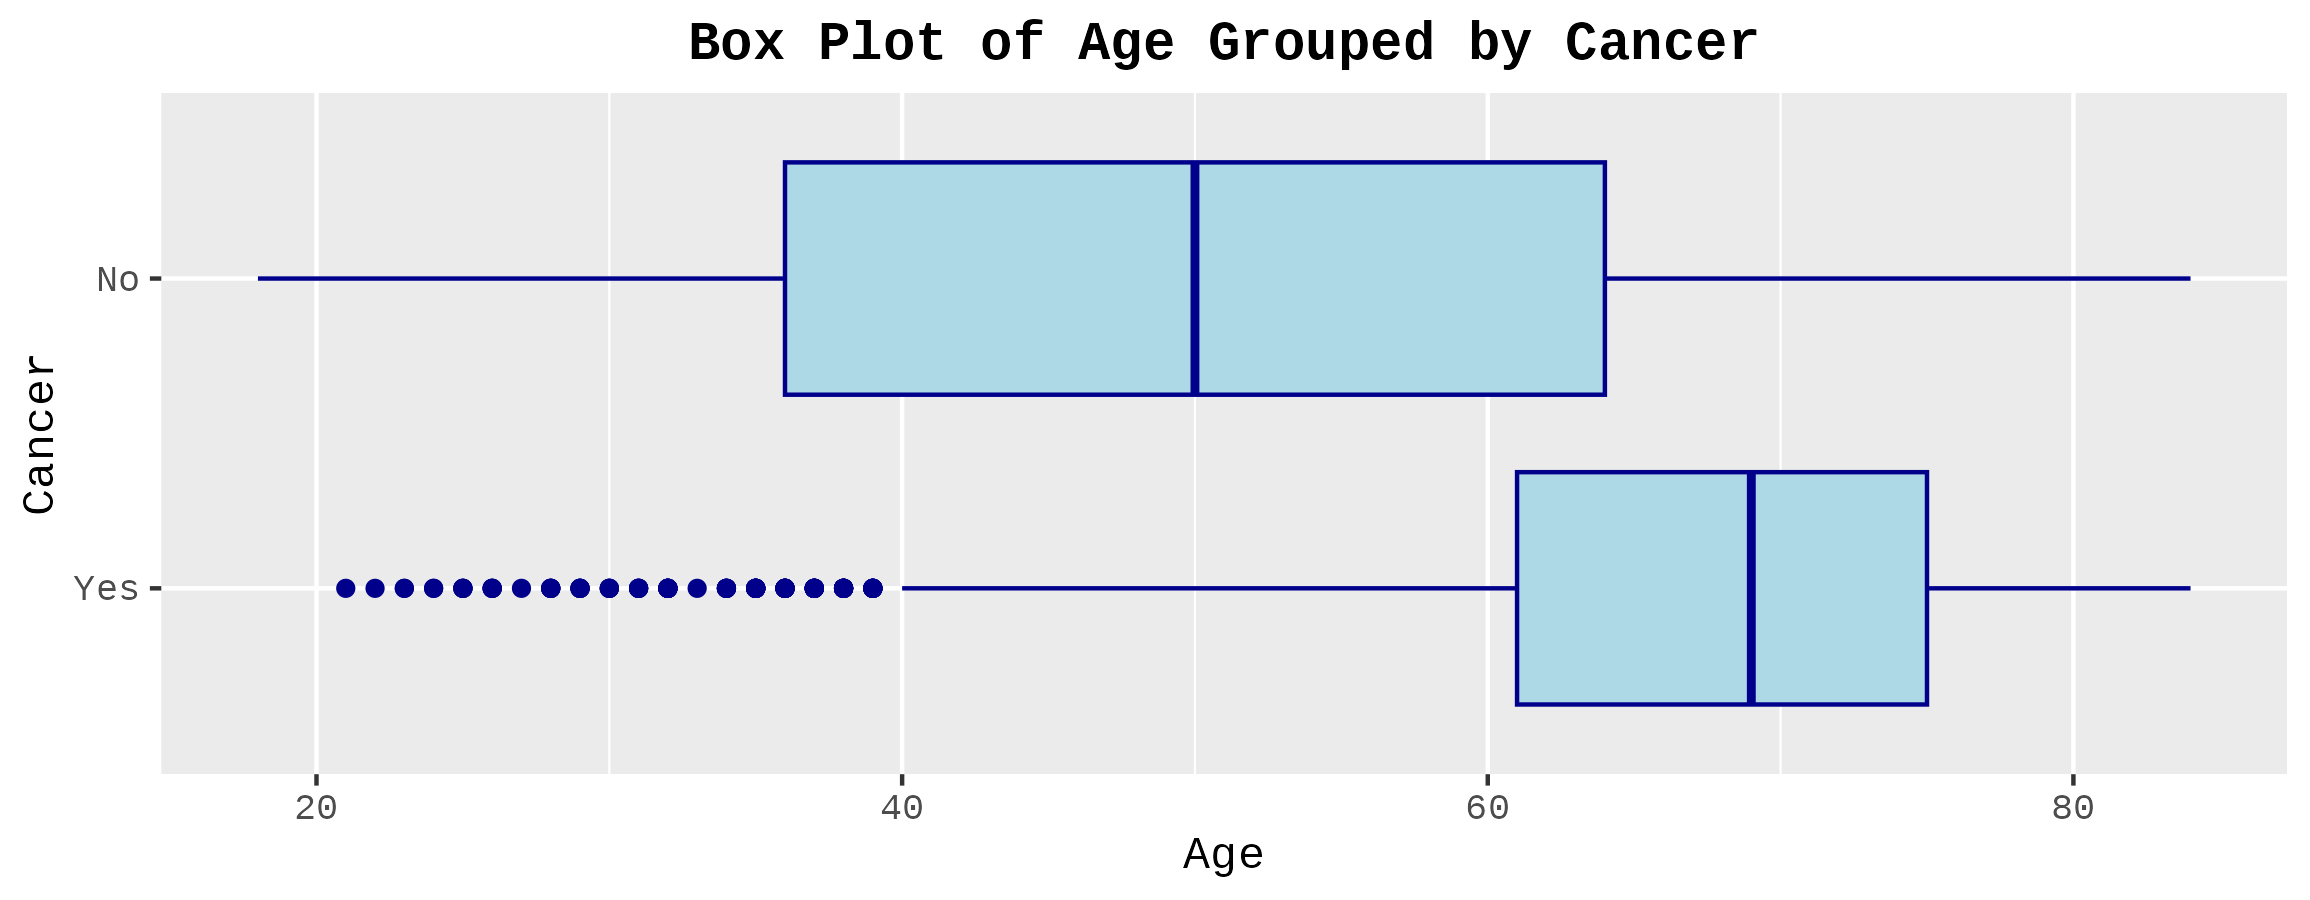

The above is a Age Box Plot that has been grouped by whether they have been told they have cancer.

For those diagnosed with cancer:
* The IQR (interquartile range) is narrower compared to those without cancer
* Multiple outliers appear on the left side, indicating some individuals are diagnosed with cancer at notably younger ages
* The median age for cancer patients is higher than the 75th percentile for the non-cancer group
* The distribution appears slightly left-skewed

For those without cancer:
* The distribution is more symmetrical
* No clear outliers are present
* The age range is more broadly distributed across middle age

In [8]:
# Folder to save images
output_folder <- "grouped_box_plots"
dir.create(output_folder, showWarnings = FALSE)


# Loop through categorical and numeric columns
for (y_var in cat_cols) {
  for (x_var in num_cols) {

        # Create grouped boxplot
        p <- ggplot(df_copy, aes(x = .data[[x_var]], y = .data[[y_var]])) +
          geom_boxplot(fill = "lightblue", color = "darkblue") +
          ggtitle(paste('Box Plot of', x_var, "Grouped by", y_var)) +
          theme(axis.text.x = element_text(size=9),
                axis.text.y = element_text(size=9),
                axis.title.x = element_text(size=11),
                axis.title.y = element_text(size=11),
                plot.title = element_text(size=13, hjust = 0.5, face='bold'),
                plot.subtitle = element_text(size=11, hjust=0.5))


        # Saving plot to output folder
        filename <- paste0(output_folder, "/", x_var, "_group_by_", y_var, ".png")
        ggsave(filename, plot = p, width = 7.7, height = 3)

  }
}

# Zip all PNGs from output_folder
zip::zip(zipfile = "grouped_box_plot.zip", files = list.files(output_folder, full.names = TRUE))

Those wanting to view all graphs can do so at the following link: [Grouped Box Plots](https://github.com/Cstan1987stat/health-survey-cluster-analysis/tree/main/graphs/grouped_box_plots).

---

**Two-Sample T-Test**

The two-sample t-test is used to determine whether there is a significant difference between the mean values of two groups. Similar to the chi-square test, we begin by stating our hypotheses:

* H<sub>0</sub> (null): There is no significant difference between the two means.

* H<sub>a</sub> (alternative): There is a significant difference between the two means.

We will use the same threshold value, 0.05, to decide whether to reject the null hypothesis in favor of the alternative hypothesis.

It's important to note that the two-sample t-test comes with certain assumptions about the data—such as normality—that, if violated, could lead to unreliable p-values. While these assumptions won't be discussed here, they should be taken into consideration if this were a formal statistical analysis.

In [9]:
# Looping through each categorical and numerical variable combination
for (cat_var in cat_cols) {
  for (num_var in num_cols) {

    # Check if the categorical variable has exactly two levels
    if (length(unique(df_copy[[cat_var]])) == 2) {

      # Performing a two sample t-test
      t_test <- t.test(df_copy[[num_var]] ~ df_copy[[cat_var]])

      # Extract p-value
      p_val <- t_test$p.value

      # Output results if the p-value is significant
      if (p_val <= 0.05) {
        cat('Significant difference found for', num_var,'grouped by', cat_var,'\n')
      }
    }
  }
}

# Printing a dashed line so the significant and nonsignificant output are clearly separated
cat('-------------------------------------------------------------------------------------\n')

# Looping through each categorical and numerical variable combination
for (cat_var in cat_cols) {
  for (num_var in num_cols) {

    # Check if the categorical variable has exactly two levels
    if (length(unique(df_copy[[cat_var]])) == 2) {

      # Perform a two-sample t-test.
      t_test <- t.test(df_copy[[num_var]] ~ df_copy[[cat_var]])

      # Extract p-value
      p_val <- t_test$p.value

      # Output results if the p-value isn't significant
      if (p_val > 0.05) {
        cat('Significant difference not found for', num_var,'grouped by', cat_var,'\n')
      }
    }
  }
}


Significant difference found for Age grouped by Sex 
Significant difference found for Height grouped by Sex 
Significant difference found for Weight grouped by Sex 
Significant difference found for Alcohol_drink_12m grouped by Sex 
Significant difference found for Age grouped by Cancer 
Significant difference found for Height grouped by Cancer 
Significant difference found for Sleep_hours grouped by Cancer 
Significant difference found for Alcohol_drink_12m grouped by Cancer 
Significant difference found for Age grouped by Coronary_heart_disease 
Significant difference found for Height grouped by Coronary_heart_disease 
Significant difference found for Weight grouped by Coronary_heart_disease 
Significant difference found for Sleep_hours grouped by Coronary_heart_disease 
Significant difference found for Alcohol_drink_12m grouped by Coronary_heart_disease 
Significant difference found for Age grouped by Depression 
Significant difference found for Height grouped by Depression 
Signific

Based on the output above, a large number of tests resulted in rejecting the null hypothesis in favor of the alternative hypothesis. For example, a significant difference was found in the mean age of males compared to females.

However, two tests did not find a significant difference: the difference in mean sleep duration between males and females, and the difference in mean weight between those who have had cancer and those who have not.

Additionally, since a considerable number of two-sample t-tests were performed, it may be beneficial in future analyses to adjust the significance threshold to account for multiple comparisons and reduce the risk of false positives [2].

---

**ANOVA**

ANOVA is somewhat similar to a two-sample t-test in that it tests whether there is a significant difference between means. However, while a two-sample t-test focuses on comparing two groups, ANOVA is used when comparing three or more groups.

The hypotheses for ANOVA are as follows:

* H<sub>0</sub> (null hypothesis): There is no significant difference between the n group means (where n is the number of groups).

* H<sub>a</sub> (alternative hypothesis): There is a significant difference between at least one of the n group means.

We then compare the resulting p-value to a predetermined threshold value, 0.05, to determine whether we can reject the null hypothesis in favor of the alternative.

As with the two-sample t-test, ANOVA relies on certain assumptions about the data—such as normality—that are not explored here. As a result, our conclusions may be unreliable if these assumptions are violated.

In [10]:
# Looping through each categorical and numerical variable combination
for (cat_var in cat_cols) {
  for (num_var in num_cols) {

    # Check if the categorical variable has more than two levels
    if (length(unique(df_copy[[cat_var]])) > 2) {

      # Performing a anova test
      anova <- aov(df_copy[[num_var]] ~ df_copy[[cat_var]])

      # Extract p-value
      p_val <- summary(anova)[[1]][["Pr(>F)"]][1]

      # Output results if the p-value is significant
      if (p_val <= 0.05) {
        cat('Significant difference found for', num_var,'grouped by', cat_var,'\n')
      }
    }
  }
}

# Printing a dashed line so the significant and nonsignificant output are clearly separated
cat('-------------------------------------------------------------------------------------\n')

# Looping through each categorical and numerical variable combination
for (cat_var in cat_cols) {
  for (num_var in num_cols) {

    # Check if the categorical variable has more than two levels
    if (length(unique(df_copy[[cat_var]])) > 2) {

      # Performing a anova test
      anova <- aov(df_copy[[num_var]] ~ df_copy[[cat_var]])

      # Extract p-value
      p_val <- summary(anova)[[1]][["Pr(>F)"]][1]

      # Output results if the p-value isn't significant
      if (p_val > 0.05) {
        cat('Significant difference not found for', num_var,'grouped by', cat_var,'\n')
      }
    }
  }
}

Significant difference found for Age grouped by Education 
Significant difference found for Height grouped by Education 
Significant difference found for Weight grouped by Education 
Significant difference found for Sleep_hours grouped by Education 
Significant difference found for Alcohol_drink_12m grouped by Education 
Significant difference found for Age grouped by Region 
Significant difference found for Height grouped by Region 
Significant difference found for Weight grouped by Region 
Significant difference found for Sleep_hours grouped by Region 
Significant difference found for Alcohol_drink_12m grouped by Region 
Significant difference found for Age grouped by Anxiety 
Significant difference found for Height grouped by Anxiety 
Significant difference found for Weight grouped by Anxiety 
Significant difference found for Sleep_hours grouped by Anxiety 
Significant difference found for Alcohol_drink_12m grouped by Anxiety 
Significant difference found for Age grouped by Aerobic.

Similar to the two-sample t-tests, many of the ANOVA tests resulted in rejecting the null hypothesis in favor of the alternative.
For example, a significant difference was found in the mean age across the different education categories.
However, no significant difference was found in mean sleep hours across the different aerobic/strength activity categories.
As mentioned earlier, it may be beneficial to adjust the p-value threshold when conducting multiple tests to reduce the risk of false positives [2].

---

# References

[1] 11.3 - Chi-Square Test of Independence. (n.d.). https://online.stat.psu.edu/stat200/book/export/html/230

[2] Unknown, U. (n.d.). Lecture 10: Multiple testing. https://www.gs.washington.edu/academics/courses/akey/56008/lecture/lecture10.pdf